In [1]:
import numpy as np
import pandas as pd

### Get net pay out yield

In [2]:
fundamental=pd.read_csv('fundamental.csv',thousands=',')

In [3]:
fundamental.head()

,GVKEY,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,curcdq,datacqtr,datafqtr,optdrq,cdvcy,prstkccy,sstky,costat,mkvaltq,prccq
0,1000,19701231,1970,4,INDL,C,D,STD,AE.2,USD,1970Q4,1970Q4,NaN,NaN,NaN,NaN,I,NaN,10.000
1,1000,19710331,1971,1,INDL,C,D,STD,AE.2,USD,1971Q1,1971Q1,NaN,NaN,NaN,NaN,I,NaN,9.750
2,1000,19710630,1971,2,INDL,C,D,STD,AE.2,USD,1971Q2,1971Q2,NaN,NaN,NaN,NaN,I,NaN,8.250
3,1000,19710930,1971,3,INDL,C,D,STD,AE.2,USD,1971Q3,1971Q3,NaN,NaN,NaN,NaN,I,NaN,4.625
4,1000,19711231,1971,4,INDL,C,D,STD,AE.2,USD,1971Q4,1971Q4,NaN,NaN,NaN,NaN,I,NaN,5.750


In [4]:
fundamental['Year']=fundamental['fyearq']

In [5]:
fundamental['npy']=((fundamental['cdvcy']+fundamental['prstkccy']-fundamental['sstky'])/fundamental['mkvaltq']).fillna(0)

In [6]:
def get_date(df):
    year=df['fyearq']
    quarter=df['fqtr']
    q_to_d=['0331','0630','0931','1231']
    return str(year)+(str(q_to_d[int(quarter)-1]))

In [7]:
fundamental['date']=fundamental['fqtr'].map({1:'0331',2:'0630',3:'0931',4:'1231'})

In [8]:
fundamental['date']=fundamental['fyearq'].apply(str)+fundamental['date']

In [9]:
fundamental

,GVKEY,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,curcdq,...,optdrq,cdvcy,prstkccy,sstky,costat,mkvaltq,prccq,Year,npy,date
0,1000,19701231,1970,4,INDL,C,D,STD,AE.2,USD,...,NaN,NaN,NaN,NaN,I,NaN,10.000,1970,0.0,19701231
1,1000,19710331,1971,1,INDL,C,D,STD,AE.2,USD,...,NaN,NaN,NaN,NaN,I,NaN,9.750,1971,0.0,19710331
2,1000,19710630,1971,2,INDL,C,D,STD,AE.2,USD,...,NaN,NaN,NaN,NaN,I,NaN,8.250,1971,0.0,19710630
3,1000,19710930,1971,3,INDL,C,D,STD,AE.2,USD,...,NaN,NaN,NaN,NaN,I,NaN,4.625,1971,0.0,19710931
4,1000,19711231,1971,4,INDL,C,D,STD,AE.2,USD,...,NaN,NaN,NaN,NaN,I,NaN,5.750,1971,0.0,19711231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163583,349972,20211231,2021,4,INDL,C,D,STD,INDP,USD,...,0.0,NaN,NaN,0.390,A,47.0763,5.700,2021,0.0,20211231
1163584,349972,20220331,2022,1,INDL,C,D,STD,INDP,USD,...,0.0,NaN,NaN,0.000,A,33.0360,4.000,2022,0.0,20220331
1163585,349972,20220630,2022,2,INDL,C,D,STD,INDP,USD,...,0.0,NaN,NaN,0.000,A,21.5560,2.610,2022,0.0,20220630
1163586,351038,20211231,2021,4,INDL,C,D,STD,QNRX,USD,...,NaN,NaN,NaN,10.103,A,NaN,1.820,2021,0.0,20211231


### Get 12-1 momentum, 36 month volatility

In [10]:
price=pd.read_csv("price.csv",thousands=',')

In [11]:
month_return=price.sort_values(['Ticker','MthCalDt']).set_index(['Ticker','MthCalDt'])['MthRet']

In [12]:
month_return = month_return[~month_return.index.duplicated(keep='first')]

In [13]:
month_return=month_return.unstack(level=1)

In [14]:
month_return.fillna(0,inplace=True)

In [15]:
month_return=month_return.transpose()

In [16]:
momentum=(np.exp(np.log(1+month_return).rolling(11).sum())-1).shift(1)

In [17]:
vol=month_return.rolling(36).std()

In [18]:
three_month_ret=(np.exp(np.log(1+month_return).rolling(3).sum())-1).shift(-3)

### Combine data together: Market cap, month ret, NPY,Momentum,Volatility

In [19]:
price['Momentum']=price.merge(momentum.stack().reset_index(),how='left',left_on=['MthCalDt','Ticker'],right_on=['MthCalDt','Ticker'])[0]

In [20]:
price['Volatility']=price.merge(vol.stack().reset_index(),how='left',left_on=['MthCalDt','Ticker'],right_on=['MthCalDt','Ticker'])[0]

In [21]:
price['MthRetThreeMonth']=price.merge(three_month_ret.stack().reset_index(),how='left',left_on=['MthCalDt','Ticker'],right_on=['MthCalDt','Ticker'])[0]

In [22]:
price

,PERMNO,SecurityType,Ticker,MthCalDt,MthPrc,MthCap,MthRet,MthVol,Momentum,Volatility,MthRetThreeMonth
0,10000,EQTY,OMFGA,19860131,4.3750,1.610000e+04,0.707317,177082.0,0.000000,0.117886,-0.085715
1,10000,EQTY,OMFGA,19860228,3.2500,1.196000e+04,-0.257143,82800.0,0.707317,0.126580,-0.043269
2,10000,EQTY,OMFGA,19860331,4.4375,1.633000e+04,0.365385,107801.0,0.268292,0.139535,-0.302817
3,10000,EQTY,OMFGA,19860430,4.0000,1.517200e+04,-0.098592,95700.0,0.731707,0.140953,-0.289062
4,10000,EQTY,OMFGA,19860530,3.1094,1.179386e+04,-0.222656,107362.0,0.560975,0.146622,-0.648241
...,...,...,...,...,...,...,...,...,...,...,...
4885820,93436,EQTY,TSLA,20220228,870.4300,8.995964e+08,-0.070768,460954079.0,0.386704,0.233273,-0.128867
4885821,93436,EQTY,TSLA,20220331,1077.6000,1.116368e+09,0.238009,574261429.0,0.303174,0.231217,-0.375074
4885822,93436,EQTY,TSLA,20220429,870.7600,9.021161e+08,-0.191945,504614206.0,0.518944,0.232744,NaN
4885823,93436,EQTY,TSLA,20220531,758.2600,7.855649e+08,-0.129197,647084157.0,0.392725,0.229401,NaN


In [23]:
price['MthCalDt']=price['MthCalDt'].astype(str)

In [24]:
final_df=fundamental[['date','tic','npy']]
price_to_merge=price[['Ticker','MthCalDt','Momentum','Volatility','MthRetThreeMonth','MthCap']]
price_to_merge.rename(columns={'Ticker':'tic','MthCalDt':'date'},inplace=True)
final_df=final_df.merge(price_to_merge,how='left',left_on=['date','tic'],right_on=['date','tic'])
final_df

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,tic,npy,Momentum,Volatility,MthRetThreeMonth,MthCap
0,19701231,AE.2,0.0,NaN,NaN,NaN,NaN
1,19710331,AE.2,0.0,NaN,NaN,NaN,NaN
2,19710630,AE.2,0.0,NaN,NaN,NaN,NaN
3,19710931,AE.2,0.0,NaN,NaN,NaN,NaN
4,19711231,AE.2,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1179845,20211231,INDP,0.0,-0.568840,0.269290,-0.298245,47076.30
1179846,20220331,INDP,0.0,-0.760869,0.266506,-0.347500,33036.00
1179847,20220630,INDP,0.0,-0.817723,0.268084,NaN,21555.99
1179848,20211231,QNRX,0.0,-0.561343,0.265933,-0.269231,15262.52


In [34]:
def portfolio_ret(df):
    '''
    Take in df for a date(quarter) and returns the 3month return of the portfolio
    top 500 market cap and top 100 npy ranking and low risk ranking 
    '''
    df=df.dropna()
    if df.shape[0]<1000:
        return 0
    df=df.sort_values('MthCap',ascending=False)[:1000]
    npy_rank=df['npy'].rank(ascending=False)
    vol_rank=df['Volatility'].rank()
    average_rank=(npy_rank+vol_rank)/2
    df['rank']=average_rank
    selected_stock=df[:500].sort_values('rank')[:100]
    ret=selected_stock['MthRetThreeMonth'].mean()
    return ret
    
    

In [35]:
ret=final_df.groupby('date').apply(portfolio_ret)

<AxesSubplot:xlabel='date'>

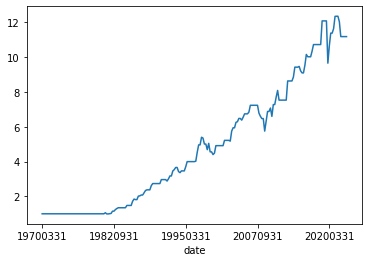

In [38]:
(1+ret).cumprod().plot()